Experiment 1
(1.a) Compute the DFT of the signal f = [2, 3, 4, 4] using the fft routine above and plot the real, imaginary, and magnitude parts of the DFT. Verify that the inverse DFT works correctly; if you do not obtain the original values back, then you must be doing something wrong. Note: we did this example in the lecture; therefore, you should be able to verify your results.


/var/folders/1c/18_hdbdx6w30l6cybmcjv74c0000gp/T/ipykernel_76295/2386501130.py:48: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequency_axis, real_part, use_line_collection=True)
/var/folders/1c/18_hdbdx6w30l6cybmcjv74c0000gp/T/ipykernel_76295/2386501130.py:53: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequency_axis, imaginary_part, use_line_collection=True)
/var/folders/1c/18_hdbdx6w30l6cybmcjv74c0000gp/T/ipykernel_76295/2386501130.py:58: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6

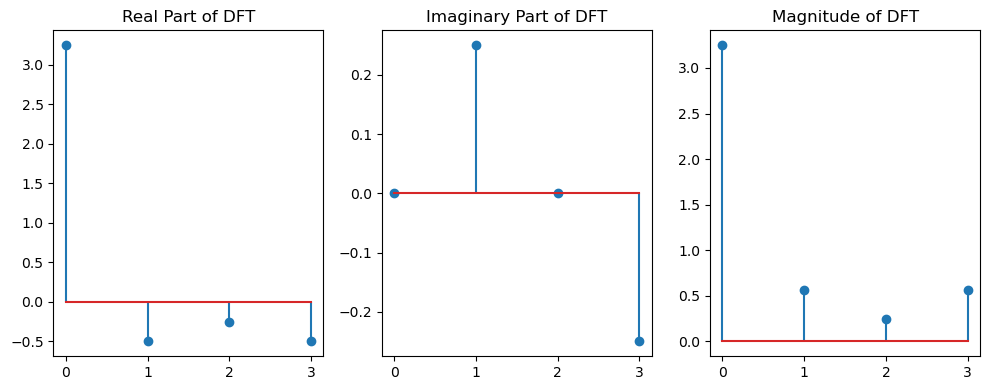

/var/folders/1c/18_hdbdx6w30l6cybmcjv74c0000gp/T/ipykernel_76295/2386501130.py:89: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequency_axis, forward_real_part, use_line_collection=True)


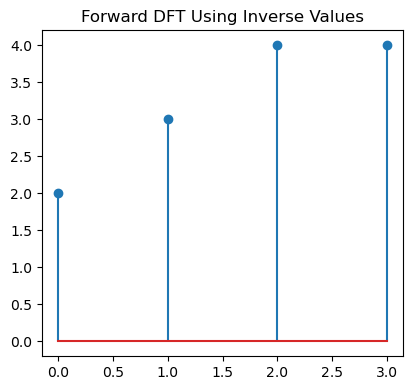

In [10]:
import matplotlib.pyplot as plt
import math

# Define the signal f
f = [2, 3, 4, 4]

# Ensure the length of the input signal is a power of 2
n = len(f)
nn = 1
while nn < n:
    nn *= 2

# Zero-pad the signal to the nearest higher power of 2
f += [0] * (nn - n)

def dft1D(x, sign):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        X[k] = np.sum(x * np.exp(sign * (-2j * np.pi * k * np.arange(N) / N)))
    
    if sign == 1:
        X /= N
    
    return X


# Calculate the DFT 
DFT_result = dft1D(f,1)

# Extract the real and imaginary parts of the DFT
real_part = [x.real for x in DFT_result]
imaginary_part = [x.imag for x in DFT_result]

# Calculate the magnitude of the DFT
magnitude = [abs(x) for x in DFT_result]

# Create a frequency axis for the DFT
N = len(f)
frequency_axis = [k for k in range(N)]

# Create a figure with three subplots for the DFT
plt.figure(figsize=(10, 4))

# Plot the real part of the DFT
plt.subplot(131)
plt.stem(frequency_axis, real_part, use_line_collection=True)
plt.title("Real Part of DFT")

# Plot the imaginary part of the DFT
plt.subplot(132)
plt.stem(frequency_axis, imaginary_part, use_line_collection=True)
plt.title("Imaginary Part of DFT")

# Plot the magnitude of the DFT
plt.subplot(133)
plt.stem(frequency_axis, magnitude, use_line_collection=True)
plt.title("Magnitude of DFT")

# Adjust subplot spacing
plt.tight_layout()

# Show the DFT plots
plt.show()

# Define the inverse DFT function
def idft(X):
    N = len(X)
    x = [complex(0, 0) for _ in range(N)]
    for n in range(N):
        for k in range(N):
            angle = 2 * math.pi * k * n / N
            x[n] += X[k] * complex(math.cos(angle), math.sin(angle))
    return x

# Compute the forward DFT using the inverse values
forward_DFT_result = idft(DFT_result)

# Extract the real and imaginary parts of the forward DFT
forward_real_part = [x.real for x in forward_DFT_result]
forward_imaginary_part = [x.imag for x in forward_DFT_result]

# Create a figure with two subplots for the forward and inverse DFTs
plt.figure(figsize=(8, 4))

# Plot the forward DFT
plt.subplot(121)
plt.stem(frequency_axis, forward_real_part, use_line_collection=True)
plt.title("Forward DFT Using Inverse Values")

# Adjust subplot spacing
plt.tight_layout()

# Show the DFT plots
plt.show()


(1.b) Generate and display a one-dimensional cosine wave with 128 samples that makes 8 cycles over a period:
f(x)=cos(2πux) whereu=8andN=128
Provide a graph of f(x) to verify that you have obtained the samples correctly. Compute the DFT f(x) and plot the real, imaginary, magnitude, and phase parts of the result. Make sure that you shift the magnitude to the center of the frequency domain using the property f(x)(-1)x  F(u – N/2) (i.e., see page 287). Report and justify your findings in your report

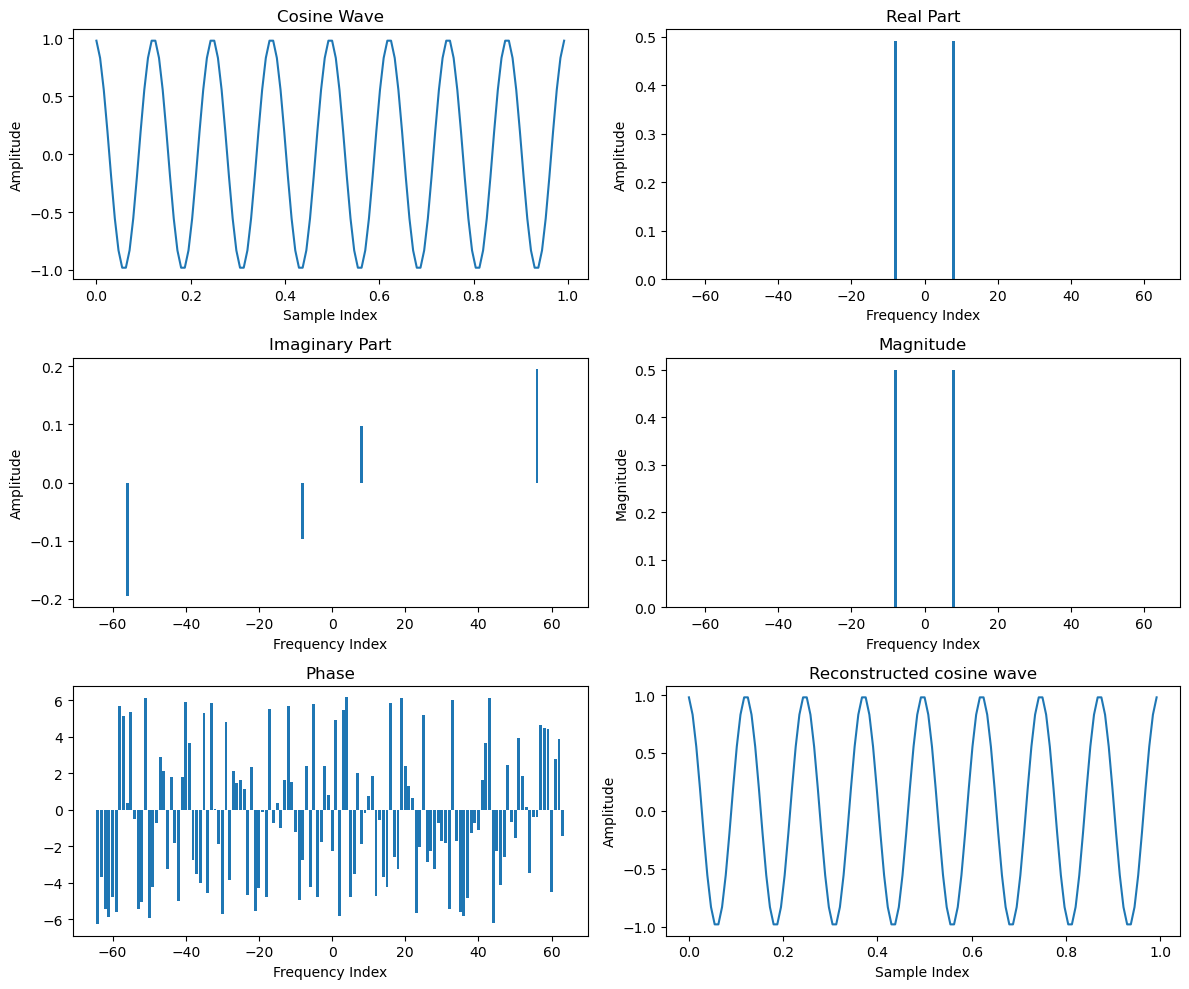

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
u = 8  # cycles per period
N = 128  # number of samples
phase_shift = np.pi / 16  # phase shift in radians

# Generate the cosine wave f(x) with a phase shift
x = np.linspace(0, 1, N, endpoint=False)
cos_wave = np.cos(2 * np.pi * u * x + phase_shift)  # Apply phase shift

# Set a larger figure size
plt.figure(figsize=(12, 10))

# Plot the cosine wave
plt.subplot(3, 2, 1)
plt.plot(x, cos_wave)
plt.title('Cosine Wave')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Define the DFT function
def dft1D(x, sign):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        X[k] = np.sum(x * np.exp(sign * (-2j * np.pi * k * np.arange(N) / N)))
    
    if sign == 1:
        X /= N
    
    return X

# Define the inverse DFT function
def idft1D(X):
    N = len(X)
    k = np.arange(N)
    n = k.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    x = np.dot(e, X)
    return x

F_u = dft1D(cos_wave, 1)

# Shift the magnitude to the center of the frequency domain
F_u_shifted = [F_u[(i + N // 2) % N] for i in range(N)]

real_part = np.real(F_u_shifted)
imaginary_part_shifted = np.imag(F_u_shifted)
magnitude = np.abs(F_u_shifted)
phase_spectrum = np.angle(F_u)

# Normalize the phase values between -pi and pi
phase_spectrum = (phase_spectrum + np.pi) % (2 * np.pi) - np.pi
max_abs = np.max(np.abs(F_u_shifted))
real_part /= (2 * max_abs)
imaginary_part /= (2 * max_abs)
magnitude /= (2 * max_abs) 
imaginary_part_non_shifted = -np.imag(F_u) / max_abs
imaginary_part_combined = imaginary_part_shifted + imaginary_part_non_shifted

phase_spectrum /= max_abs 
# Plot of real part of the DFT
plt.subplot(3, 2, 2)
plt.bar(np.arange(-N/2, N/2), real_part)
plt.title('Real Part')
plt.xlabel('Frequency Index')
plt.ylabel('Amplitude')

# Plot of imaginary part of the DFT
plt.subplot(3, 2, 3)
plt.bar(np.arange(-N/2, N/2), imaginary_part_combined)
plt.title('Imaginary Part')
plt.xlabel('Frequency Index')
plt.ylabel('Amplitude')

# Plot of magnitude part
plt.subplot(3, 2, 4)
plt.bar(np.arange(-N/2, N/2), magnitude)
plt.title('Magnitude')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')

# Plot of phase part
plt.subplot(3, 2, 5)
plt.bar(np.arange(-N/2, N/2), phase_spectrum)
plt.title('Phase')
plt.xlabel('Frequency Index')

# Reconstruct the signal using the corrected inverse DFT
x_reconstructed = idft1D(F_u)

# Plot of reconstructed cosine wave
plt.subplot(3, 2, 6)
plt.plot(x, x_reconstructed)
plt.title('Reconstructed cosine wave')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


(1.c) Repeat the same experiment but this time for the Rectangular function (file: "Rect_128.dat”).
For the rest of the experiments, you would need to implement the 2-D DFT as well as its inverse. Your implementation should take advantage of the separability property that we discussed in the lecture (i.e., compute the 2-D DFT by computing the 1-D DFT on the rows, followed by the 1-D DFT on the columns of the result). Use the function prototype below – you need to implement one function only, the value of isign and the inputs will determine whether you will be computing the forward or inverse transformation!
Before performing the experiments below, make sure that your 2-D DFT works correctly. For example, take the 2-D DFT of an image, followed by the inverse 2-D DFT; if you don't get the original image back, then you must be doing something wrong.

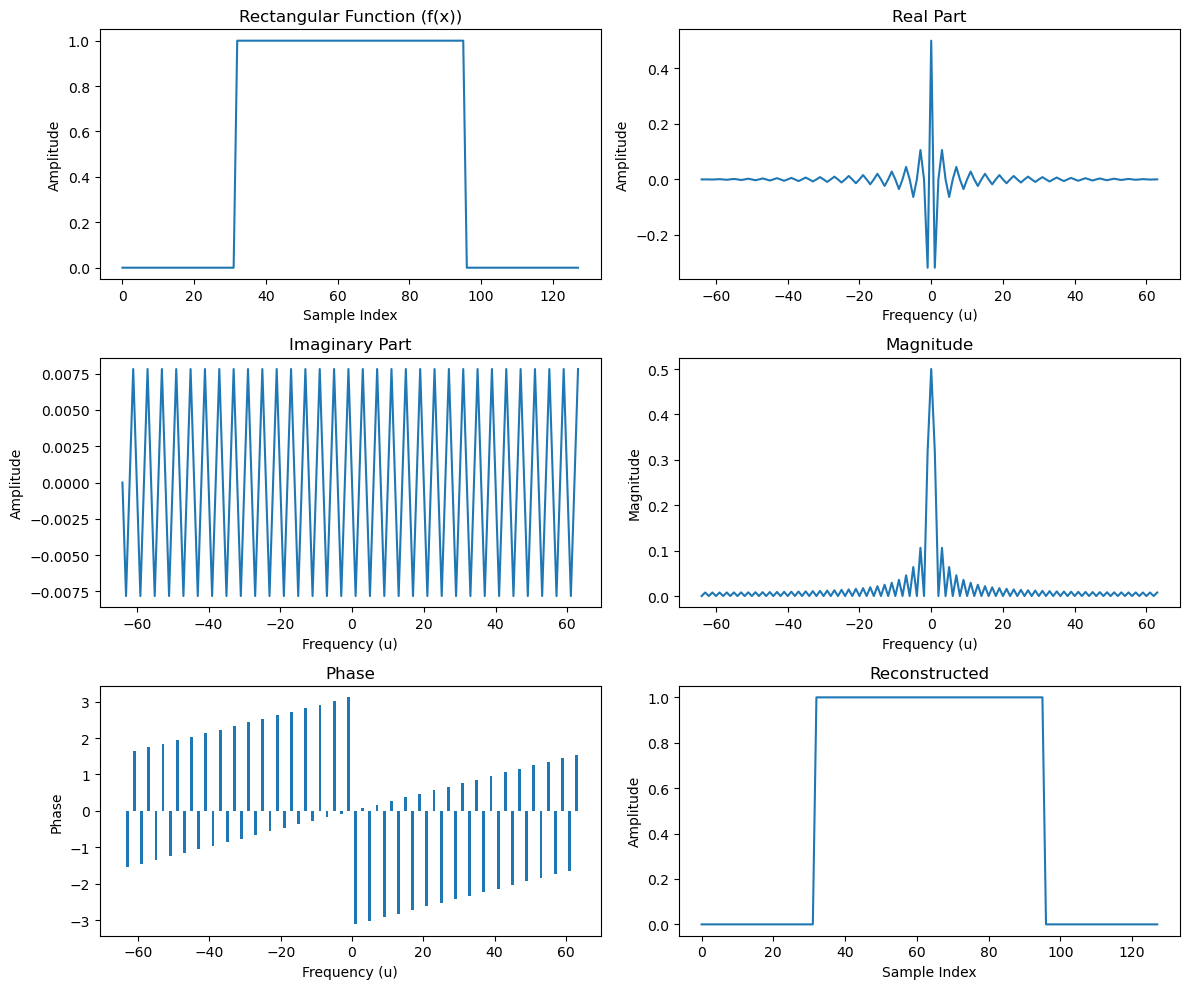

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Custom data points for the Rectangular function
data_points = [
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000,
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
    0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
]
N = len(data_points)

# Plot the custom Rectangular function
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.plot(data_points)
plt.title("Rectangular Function (f(x))")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

# Define the DFT function
def dft1D(x, sign):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        X[k] = np.sum(x * np.exp(sign * (-2j * np.pi * k * np.arange(N) / N)))
    
    if sign == 1:
        X /= N
    
    return X

# Define the inverse DFT function
def idft1D(X):
    N = len(X)
    k = np.arange(N)
    n = k.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    x = np.dot(e, X)
    return x

# Compute the DFT of f(x)
dft_result = dft1D(data_points, 1)

# Shift the magnitude to the center of the frequency domain
shifted_dft = [dft_result[(i + N // 2) % N] for i in range(N)]

# Extract the real, imaginary, magnitude, and phase parts
real_part = [x.real for x in shifted_dft]
imaginary_part = [x.imag for x in shifted_dft]
magnitude = [abs(x) for x in shifted_dft]
phase = [np.angle(x) if abs(x) > 1e-10 else 0 for x in shifted_dft]

# Normalize the phase to the range [-pi, pi]
phase = np.angle(np.exp(1j*np.array(phase)))

# Create a frequency axis for the DFT
frequency_axis = [i - N // 2 for i in range(N)]


# Plot of real part
plt.subplot(3, 2, 2)
plt.plot(frequency_axis, real_part)
plt.title("Real Part")
plt.xlabel("Frequency (u)")
plt.ylabel("Amplitude")

# Plot of imaginary part
plt.subplot(3, 2, 3)
plt.plot(frequency_axis, imaginary_part)
plt.title("Imaginary Part")
plt.xlabel("Frequency (u)")
plt.ylabel("Amplitude")

# Plot of magnitude
plt.subplot(3, 2, 4)
plt.plot(frequency_axis, magnitude)
plt.title("Magnitude")
plt.xlabel("Frequency (u)")
plt.ylabel("Magnitude")

# Plot of phase
plt.subplot(3, 2, 5)
plt.bar(frequency_axis, phase)
plt.title("Phase")
plt.xlabel("Frequency (u)")
plt.ylabel("Phase")

# Reconstruct the signal using the inverse DFT
x_reconstructed = idft1D(dft_result)

# Plot of reconstructed cosine wave
plt.subplot(3, 2, 6)
plt.plot(x_reconstructed)
plt.title('Reconstructed')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


(2.a) Generate a 512 x 512 image which contains a 32 x 32 square placed at the center of the image. Set the background to black (i.e., 0) and the interior of the square (and its boundary) to white (i.e., 255). The image should look like the one shown in Fig. 4.23 on page 296 in your textbook. Take the DFT of the image and show its magnitude without shifting it to the center of the frequency domain. Then, shift the magnitude to the center of the frequency domain using the property f(x,y)(-1)x+y <--> F(u – N/2, v - N/2) from (see Table 4.4 on page 305 in your textbook) and show the centered magnitude. Your results should look similar to those shown in Fig. 4.23(d) on page 296. Note: to properly show the magnitude of the DFT, you should use the c x log(1+|F(u,v)|) transformation as discussed in the lecture. Report and justify your findings in your report.

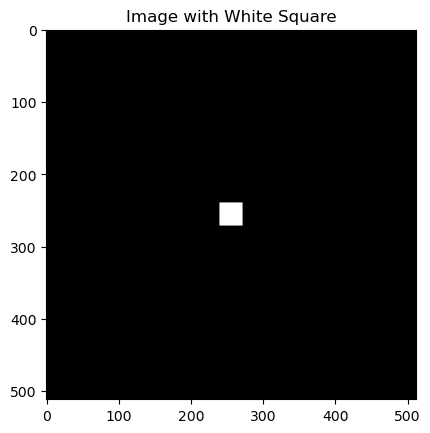

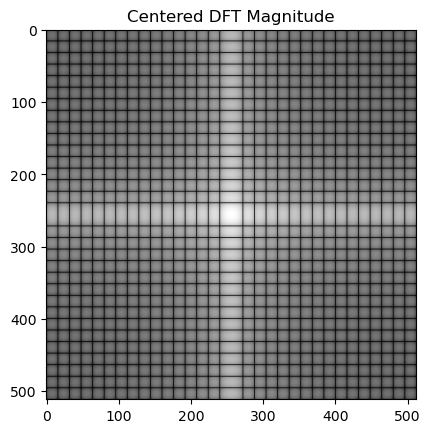

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# DFT Function
def dft1D(x, sign):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        X[k] = np.sum(x * np.exp(sign * (-2j * np.pi * k * np.arange(N) / N)))
    
    if sign == 1:
        X /= N
    
    return X

def dft2D(x, sign):
    N, M = x.shape
    result = np.zeros((N, M), dtype=complex)

    for u in range(N):
        result[u, :] = dft1D(x[u, :], sign)

    for v in range(M):
        result[:, v] = dft1D(result[:, v], sign)

    return result

# Create a 512x512 black and white image
image_size = 512
square_size = 32

# Initialize the image with all zeros (black)
image = np.zeros((image_size, image_size), dtype=np.uint8)

# Calculate the position to place the white square at the center
square_x = (image_size - square_size) // 2
square_y = (image_size - square_size) // 2

# Fill the square region with white (255)
image[square_y:square_y + square_size, square_x:square_x + square_size] = 255

# Display the original image
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Image with White Square")
plt.show()

# Convert the image to a 1D list for DFT calculation
image_flat = image.flatten()

# Reshape the image into a 2D array for 2D Dft
image_2d = image_flat.reshape((image_size, image_size))

# Compute the forward 2-D DFT
F_uv = dft2D(image_2d, -1)

# Compute the magnitude of the DFT
magnitude = np.abs(F_uv)

# Center the magnitude by shifting the zero frequency components to the center
centered_magnitude = np.zeros((image_size, image_size), dtype=float)

for u in range(image_size):
    for v in range(image_size):
        centered_u = (u + image_size // 2) % image_size
        centered_v = (v + image_size // 2) % image_size
        centered_magnitude[u, v] = magnitude[centered_u, centered_v]

# Apply the logarithmic transformation to the centered magnitude
log_centered_magnitude = np.log(1 + np.abs(centered_magnitude))

# Display the centered DFT magnitude
plt.imshow(log_centered_magnitude, cmap='gray', vmin=0, vmax=log_centered_magnitude.max())
plt.title("Centered DFT Magnitude")
plt.show()


(2.b) Generate a 512 x 512 image which contains a 64 x 64 square placed at the center of the image. Repeat the steps given in (2.a). How do your results compare with (2.a)?

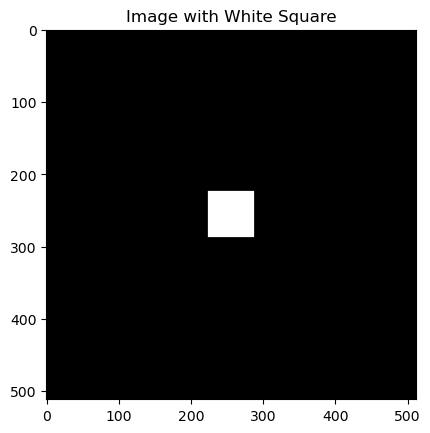

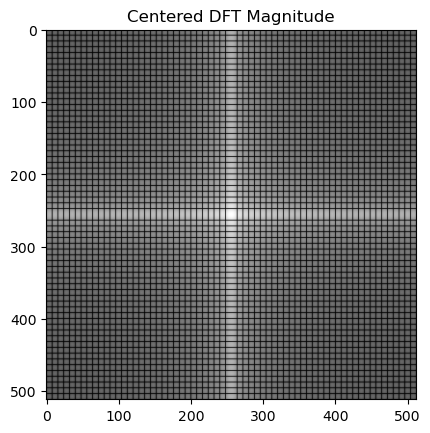

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# DFT Function
def dft1D(x, sign):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        X[k] = np.sum(x * np.exp(sign * (-2j * np.pi * k * np.arange(N) / N)))
    
    if sign == 1:
        X /= N

    return X

def dft2D(x, sign):
    N, M = x.shape
    result = np.zeros((N, M), dtype=complex)

    for u in range(N):
        result[u, :] = dft1D(x[u, :], sign)

    for v in range(M):
        result[:, v] = dft1D(result[:, v], sign)

    return result

# Create a 512x512 black and white image
image_size = 512
square_size = 64

# Initialize the image with all zeros (black)
image = np.zeros((image_size, image_size), dtype=np.uint8)

# Calculate the position to place the white square at the center
square_x = (image_size - square_size) // 2
square_y = (image_size - square_size) // 2

# Fill the square region with white (255)
image[square_y:square_y + square_size, square_x:square_x + square_size] = 255

# Display the original image
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Image with White Square")
plt.show()

# Convert the image to a 1D list for DFT calculation
image_flat = image.flatten()

# Reshape the image into a 2D array for 2D Dft
image_2d = image_flat.reshape((image_size, image_size))

# Compute the forward 2-D DFT
F_uv = dft2D(image_2d, -1)

# Compute the magnitude of the DFT
magnitude = np.abs(F_uv)

# Center the magnitude by shifting the zero frequency components to the center
centered_magnitude = np.zeros((image_size, image_size), dtype=float)

for u in range(image_size):
    for v in range(image_size):
        centered_u = (u + image_size // 2) % image_size
        centered_v = (v + image_size // 2) % image_size
        centered_magnitude[u, v] = magnitude[centered_u, centered_v]

# Apply the logarithmic transformation to the centered magnitude
log_centered_magnitude = np.log(1 + np.abs(centered_magnitude))

# Display the centered DFT magnitude
plt.imshow(log_centered_magnitude, cmap='gray', vmin=0, vmax=log_centered_magnitude.max())
plt.title("Centered DFT Magnitude")
plt.show()


(2.c) Generate a 512 x 512 image which contains a 128 x 128 square placed at the center of the image. Repeat the steps given in (2.a). How do your results compare with (2.a) and (2.b)?

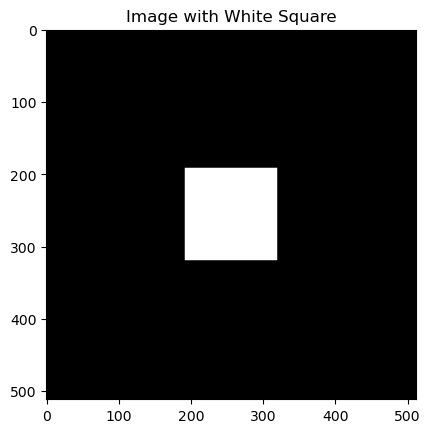

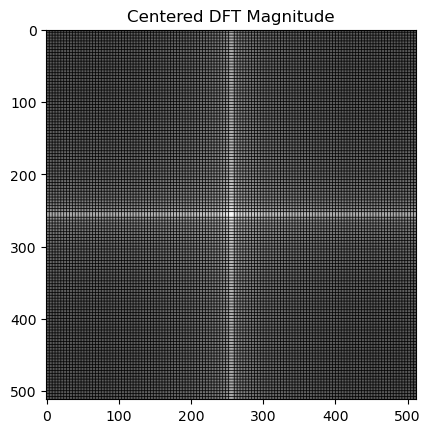

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# DFT Function
def dft1D(x, sign):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        X[k] = np.sum(x * np.exp(sign * (-2j * np.pi * k * np.arange(N) / N)))
    
    if sign == 1:
        X /= N

    return X

def dft2D(x, sign):
    N, M = x.shape
    result = np.zeros((N, M), dtype=complex)

    for u in range(N):
        result[u, :] = dft1D(x[u, :], sign)

    for v in range(M):
        result[:, v] = dft1D(result[:, v], sign)

    return result

# Create a 512x512 black and white image
image_size = 512
square_size = 128

# Initialize the image with all zeros (black)
image = np.zeros((image_size, image_size), dtype=np.uint8)

# Calculate the position to place the white square at the center
square_x = (image_size - square_size) // 2
square_y = (image_size - square_size) // 2

# Fill the square region with white (255)
image[square_y:square_y + square_size, square_x:square_x + square_size] = 255

# Display the original image
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Image with White Square")
plt.show()

# Convert the image to a 1D list for DFT calculation
image_flat = image.flatten()

# Reshape the image into a 2D array for 2D Dft
image_2d = image_flat.reshape((image_size, image_size))

# Compute the forward 2-D DFT
F_uv = dft2D(image_2d, -1)

# Compute the magnitude of the DFT
magnitude = np.abs(F_uv)

# Center the magnitude by shifting the zero frequency components to the center
centered_magnitude = np.zeros((image_size, image_size), dtype=float)

for u in range(image_size):
    for v in range(image_size):
        centered_u = (u + image_size // 2) % image_size
        centered_v = (v + image_size // 2) % image_size
        centered_magnitude[u, v] = magnitude[centered_u, centered_v]

# Apply the logarithmic transformation to the centered magnitude
log_centered_magnitude = np.log(1 + np.abs(centered_magnitude))

# Display the centered DFT magnitude
plt.imshow(log_centered_magnitude, cmap='gray', vmin=0, vmax=log_centered_magnitude.max())
plt.title("Centered DFT Magnitude")
plt.show()


(3.a) Set the phase equal to zero, and take the inverse DFT (hint: set the real part to the magnitude of the image and the imaginary part to zero). The resulting image should look nothing like the original. Explain your results.

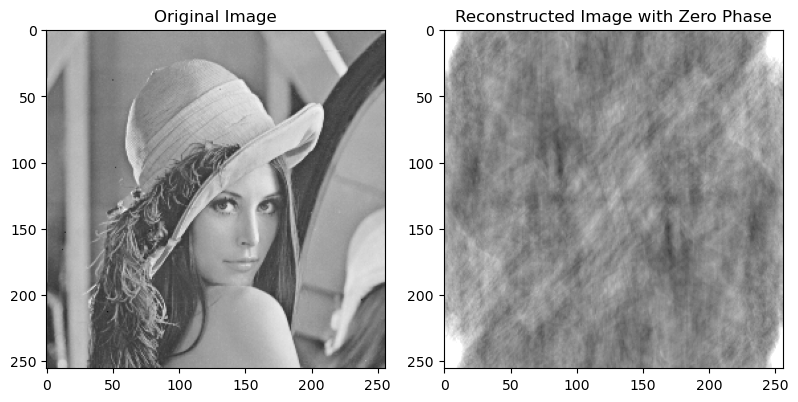

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def load_image(Image):
    with open(Image, 'rb') as I:
        header = I.readline().decode('utf-8').strip()
        if header != 'P2' and header != 'P5':
            raise ValueError("Only PGM format is supported.")

        while True:
            line = I.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        size = line.split()
        width, height = map(int, size)
        max_val = int(I.readline().decode('utf-8'))
        image_data = I.read()

        image = np.zeros((height, width), dtype=int)
        index = 0
        for i in range(height):
            for j in range(width):
                image[i, j] = int(image_data[index])
                index += 1
    return image

def dft1D(x, sign):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(sign * -2j * np.pi * k * n / N)
    return np.dot(M, x)

def dft2D(x, sign):
    N, M = x.shape
    result = np.zeros((N, M), dtype=complex)

    for u in range(N):
        result[u, :] = dft1D(x[u, :], sign)

    for v in range(M):
        result[:, v] = dft1D(result[:, v], sign)

    return result

def inverse_dft_zero_phase(image_2d):
    # Compute the forward 2D DFT
    F_uv = dft2D(image_2d, -1)

    # Set the phase to zero
    F_uv_zero_phase = np.abs(F_uv)

    # Compute the inverse 2D DFT in spatial domain
    reconstructed_image_2d = np.real(dft2D(F_uv_zero_phase, 1) / (F_uv_zero_phase.shape[0] * F_uv_zero_phase.shape[1]))

    return reconstructed_image_2d

# Load the PGM image using load_image function
image = load_image("lenna.pgm")

# Convert the image to a NumPy array
image_array = np.array(image)

# Convert the image to float for Fourier Transform
image_float = image_array.astype(float)

# Perform inverse DFT with magnitude as real part and zero phase
reconstructed_image_2d = inverse_dft_zero_phase(image_float)

# Reshape and display the original and reconstructed image with zero phase
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")

# Reshape and display the reconstructed image with zero phase
plt.subplot(2, 3, 2)
plt.imshow(reconstructed_image_2d, cmap='gray', vmin=0, vmax=255)
plt.title("Reconstructed Image with Zero Phase")

plt.tight_layout()
plt.show()


(3.b) Let the phase be the original one and set the magnitude equal to one and take the inverse DFT (hint: to set the magnitude equal to one, set the real part to cos(theta) and the imaginary part to sin(theta) where theta=tan-1(imag/real) – make sure that you understand why this works). Since the magnitude is set to such a small value in the frequency domain, all the values in the spatial domain will be very small when you take the inverse DFT. To alleviate this problem, rescale the pixel values after the inverse DFT has been taken (i.e., values should be in [0, 255]). Explain your results.
Note: to compute tan-1, use the function atan2().

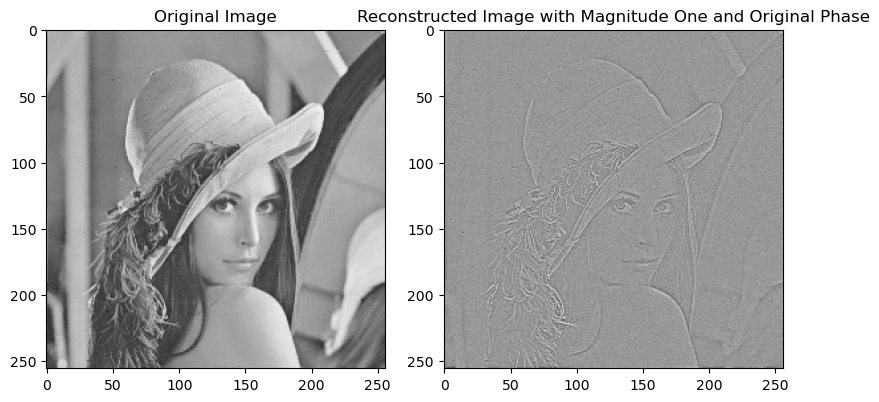

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def load_image(Image):
    with open(Image, 'rb') as I:
        header = I.readline().decode('utf-8').strip()
        if header != 'P2' and header != 'P5':
            raise ValueError("Only PGM format is supported.")

        while True:
            line = I.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        size = line.split()
        width, height = map(int, size)
        max_val = int(I.readline().decode('utf-8'))
        image_data = I.read()

        image = [[0] * width for _ in range(height)]
        index = 0
        for i in range(height):
            for j in range(width):
                image[i][j] = int(image_data[index])
                index += 1
    return image

def dft1D(x, sign):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        X[k] = np.sum(x * np.exp(sign * (-2j * np.pi * k * np.arange(N) / N)))
    
    if sign == 1:
        X /= N

    return X


def dft2D(x, sign):
    N, M = x.shape
    result = np.zeros((N, M), dtype=complex)

    for u in range(N):
        result[u, :] = dft1D(x[u, :], sign)

    for v in range(M):
        result[:, v] = dft1D(result[:, v], sign)

    return result

# Load the PGM image using load_image function
image = load_image("lenna.pgm")

# Convert the image to a 1D list for DFT calculation
image_size = len(image)
image_flat = np.array(image).flatten()

# Reshape the image into a 2D array for fft2D
image_2d = image_flat.reshape((image_size, image_size))

# Compute the forward 2-D DFT
F_uv = dft2D(image_2d, -1)

# Get the original phase
original_phase = np.angle(F_uv)

# Set the magnitude to one with the original phase
magnitude_one = np.ones_like(original_phase)
F_uv_magnitude_one = magnitude_one * np.exp(1j * original_phase)

# Compute the inverse 2-D DFT with magnitude one and original phase
reconstructed_image_2d = np.real(dft2D(F_uv_magnitude_one, 1))

# Rescale the pixel values to [0, 255]
reconstructed_image_flat = reconstructed_image_2d.flatten()
reconstructed_image_flat -= np.min(reconstructed_image_flat)
reconstructed_image_flat /= np.max(reconstructed_image_flat)
reconstructed_image_flat *= 255

# Reshape and display the original, DFT magnitude, centered DFT magnitude, and reconstructed image with magnitude one and original phase
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image_2d, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")

# Reshape and display the reconstructed image with magnitude one and original phase
plt.subplot(2, 3, 2)
reconstructed_image = reconstructed_image_flat.reshape((image_size, image_size))
plt.imshow(reconstructed_image, cmap='gray', vmin=0, vmax=255)
plt.title("Reconstructed Image with Magnitude One and Original Phase")

plt.tight_layout()
plt.show()
